# Fixing the view for Detection and Tracking Example

Becuase of the wind sometime the drone moves a bit randomly. As a result, the frames will have a slight transition and rotation. This is undesriable as it will make the a transition and rotation in the detected trajectories as well. For that, we need to do some transformation on the frames to make them all to have the same view.

In the following example of the sample video all the frames should have the same position. 

All the parameters for view fixing are in `config.py` file.

First of all, all the required liberaries should be imported.

In [2]:
from offlinemot.utils_ import resize
from offlinemot.fix_view import FixView, BG_subtractor
from offlinemot.config import config

In [1]:
import numpy as np 
import os
import cv2 

Now the sample video should be read with a video reader object from Opencv liberary

In [3]:
cap = cv2.VideoCapture(os.path.join(config.cwd,'model','sample.mp4'))
ret, bg = cap.read() # read the first frame

The first frame is considered the default frame in the start to compare it with the next frames in the video in order to detect the transformation needed to each frame.

In the case where we want start to the movement detection at some later frame, not the first one. We could write

In [4]:
frame_id = 1 # the frame that should we start from
cap.set(1, frame_id-1)

True

Then the first reference frame is read

In [5]:
ret,bg_rgb = cap.read()

Then we intilize the fix view and background substarctor objects. The latter is needed so we can see the effect of stabilizing the view.

In [6]:
Fix_obj = FixView(bg_rgb)
BG_s = BG_subtractor(bg)
ret, frame = cap.read()

To start fixing each frame at the start we need the forground mask. For that we run the background substarction one time before the main loop

In [7]:

fg_img= BG_s.bg_substract(frame)

## Main loop
Now it is time to start the fixing and background substarction loop.
The result will be shown in a new window

The video will keep running until you hit **ESC** or the video ends

In [8]:
while ret:
    frame_id += 1
    
    frame = Fix_obj.fix_view(frame,fg_img)
    I_com = BG_s.bg_substract(frame)
    
    cv2.imshow('fgmask', resize(frame,0.2)) 
    
    #print(frame_id)
    k = cv2.waitKey(30) & 0xff
    if k == 27: 
        break
    ret, frame = cap.read()

cap.release() 
cv2.destroyAllWindows() 

We find that the program is slow. but we will try to run the step of filtering of small objects to evaluate the performace of the program.

In [12]:
cap = cv2.VideoCapture(os.path.join(config.cwd,'model','sample.mp4'))
ret, bg = cap.read() # read the first frame

BG_s = BG_subtractor(bg)
Fix_obj = FixView(bg_rgb)
ret, frame = cap.read()

fg_img= BG_s.bg_substract(frame)
frame_id = 0
while ret:
    frame_id += 1
    
    I_com = BG_s.bg_substract(frame)
    # filter small objects
    I_com, _ = BG_s.get_big_objects(I_com,frame)
    
    cv2.imshow('fgmask', resize(frame,0.2)) 
    
    #print(frame_id)
    # save one frame for showing in the notebook
    if frame_id == 30:
        frame_2_save = resize(I_com).copy()
    k = cv2.waitKey(30) & 0xff
    if k == 27: 
        break
    ret, frame = cap.read()

cap.release() 
cv2.destroyAllWindows() 

At the end we can show the background subtraction result in step 30.

In [10]:
%matplotlib inline

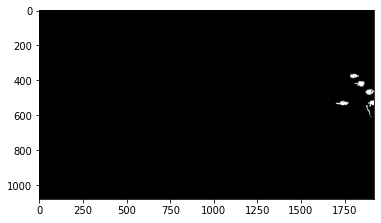

In [13]:
import matplotlib.pyplot as plt
plt.imshow(frame_2_save)